# Entire Original Case Study Analysis - Fantasy Football  

April Meyer

DSC550-T301 Data Mining (2211-1)   

##### Problem Statement
For my case study I chose Fantasy Football Analysis. I selected this topic because this is my first time participating in a fantasy football league, so I thought it would be helpful to understand all the different analysis in my ESPN fantasy app. Specifically, I would like to understand how the players’ projections are created.  

##### Question
How to project a player’s Fantasy Football points?  

##### Dataset
I used a free data set from profootballreference.com that has 2019 data on all players that played that year.  

In [15]:
from IPython.display import HTML
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the imported libraries and raw code."></form>''')

### Part 1
#### Step-by-step Instructions for Graph Analysis:
* Step 1:  Load data into a dataframe.
* Step 2:  Check the dimension of the dataframe.
* Step 3:  Check what type of variables are in the dataframe.
* Step 4:  Look at summary information about your data.
* Step 5:  Check summary statistics among features.
* Step 6:  Check correlations among features.
* Step 7:  Check visualizations for insights.

In [21]:
print("Step 1: Load data into a dataframe.\n")

# Load the data from the “2019.csv” file into a DataFrame.
data_2019 = pd.read_csv('2019.csv')

Step 1: Load data into a dataframe.



In [22]:
print("Step 2: Check the dimension of the dataframe.\n")
# Step 2: Display the dimensions of the file 
print("The dimension of the table is: ", data_2019.shape)

Step 2: Check the dimension of the dataframe.

The dimension of the table is:  (620, 28)


In [23]:
print("Step 3: Check what type of variables are in the dataframe.\n")
# clean up the player name column
data_2019['Player'] = data_2019['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
data_2019.info(verbose=True)

Step 3: Check what type of variables are in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     620 non-null    int64  
 1   Player         620 non-null    object 
 2   Tm             620 non-null    object 
 3   Pos            620 non-null    object 
 4   Age            620 non-null    float64
 5   G              620 non-null    float64
 6   GS             620 non-null    float64
 7   Cmp            620 non-null    float64
 8   Att            620 non-null    float64
 9   Yds            620 non-null    float64
 10  Int            620 non-null    float64
 11  Att.1          620 non-null    float64
 12  Yds.1          620 non-null    float64
 13  Tgt            620 non-null    float64
 14  Rec            620 non-null    float64
 15  Yds.2          620 non-null    float64
 16  Y/R            620 non-null    float64

In [25]:
print("Step 4:  Look at summary information about my data.\n")
print("Summarized Data")
print(data_2019.describe(include=['O']))

Step 4:  Look at summary information about my data.

Summarized Data
              Player   Tm  Pos
count            620  620  620
unique           619   34    5
top     Ryan Griffin  NYG   WR
freq               2   24  217


In [26]:
print("Step 5: Check summary statistics among features.\n")
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
print("Describe Data")
print(data_2019.describe())

Step 5: Check summary statistics among features.

Describe Data
       Unnamed: 0         Age           G          GS        Cmp         Att  \
count  620.000000  620.000000  620.000000  620.000000  620.00000  620.000000   
mean   309.500000   26.008065   10.566129    4.953226   18.26129   28.772581   
std    179.122863    3.406010    5.255090    5.408610   70.31567  110.033237   
min      0.000000   21.000000    1.000000    0.000000    0.00000    0.000000   
25%    154.750000   24.000000    6.000000    0.000000    0.00000    0.000000   
50%    309.500000   25.000000   12.000000    3.000000    0.00000    0.000000   
75%    464.250000   27.000000   16.000000    9.000000    0.00000    0.000000   
max    619.000000   42.000000   17.000000   16.000000  408.00000  626.000000   

               Yds         Int       Att.1        Yds.1  ...  FumblesLost  \
count   620.000000  620.000000  620.000000   620.000000  ...   620.000000   
mean    207.772581    0.658065   21.572581    93.114516  ... 

Step 6: Check correlations among features.



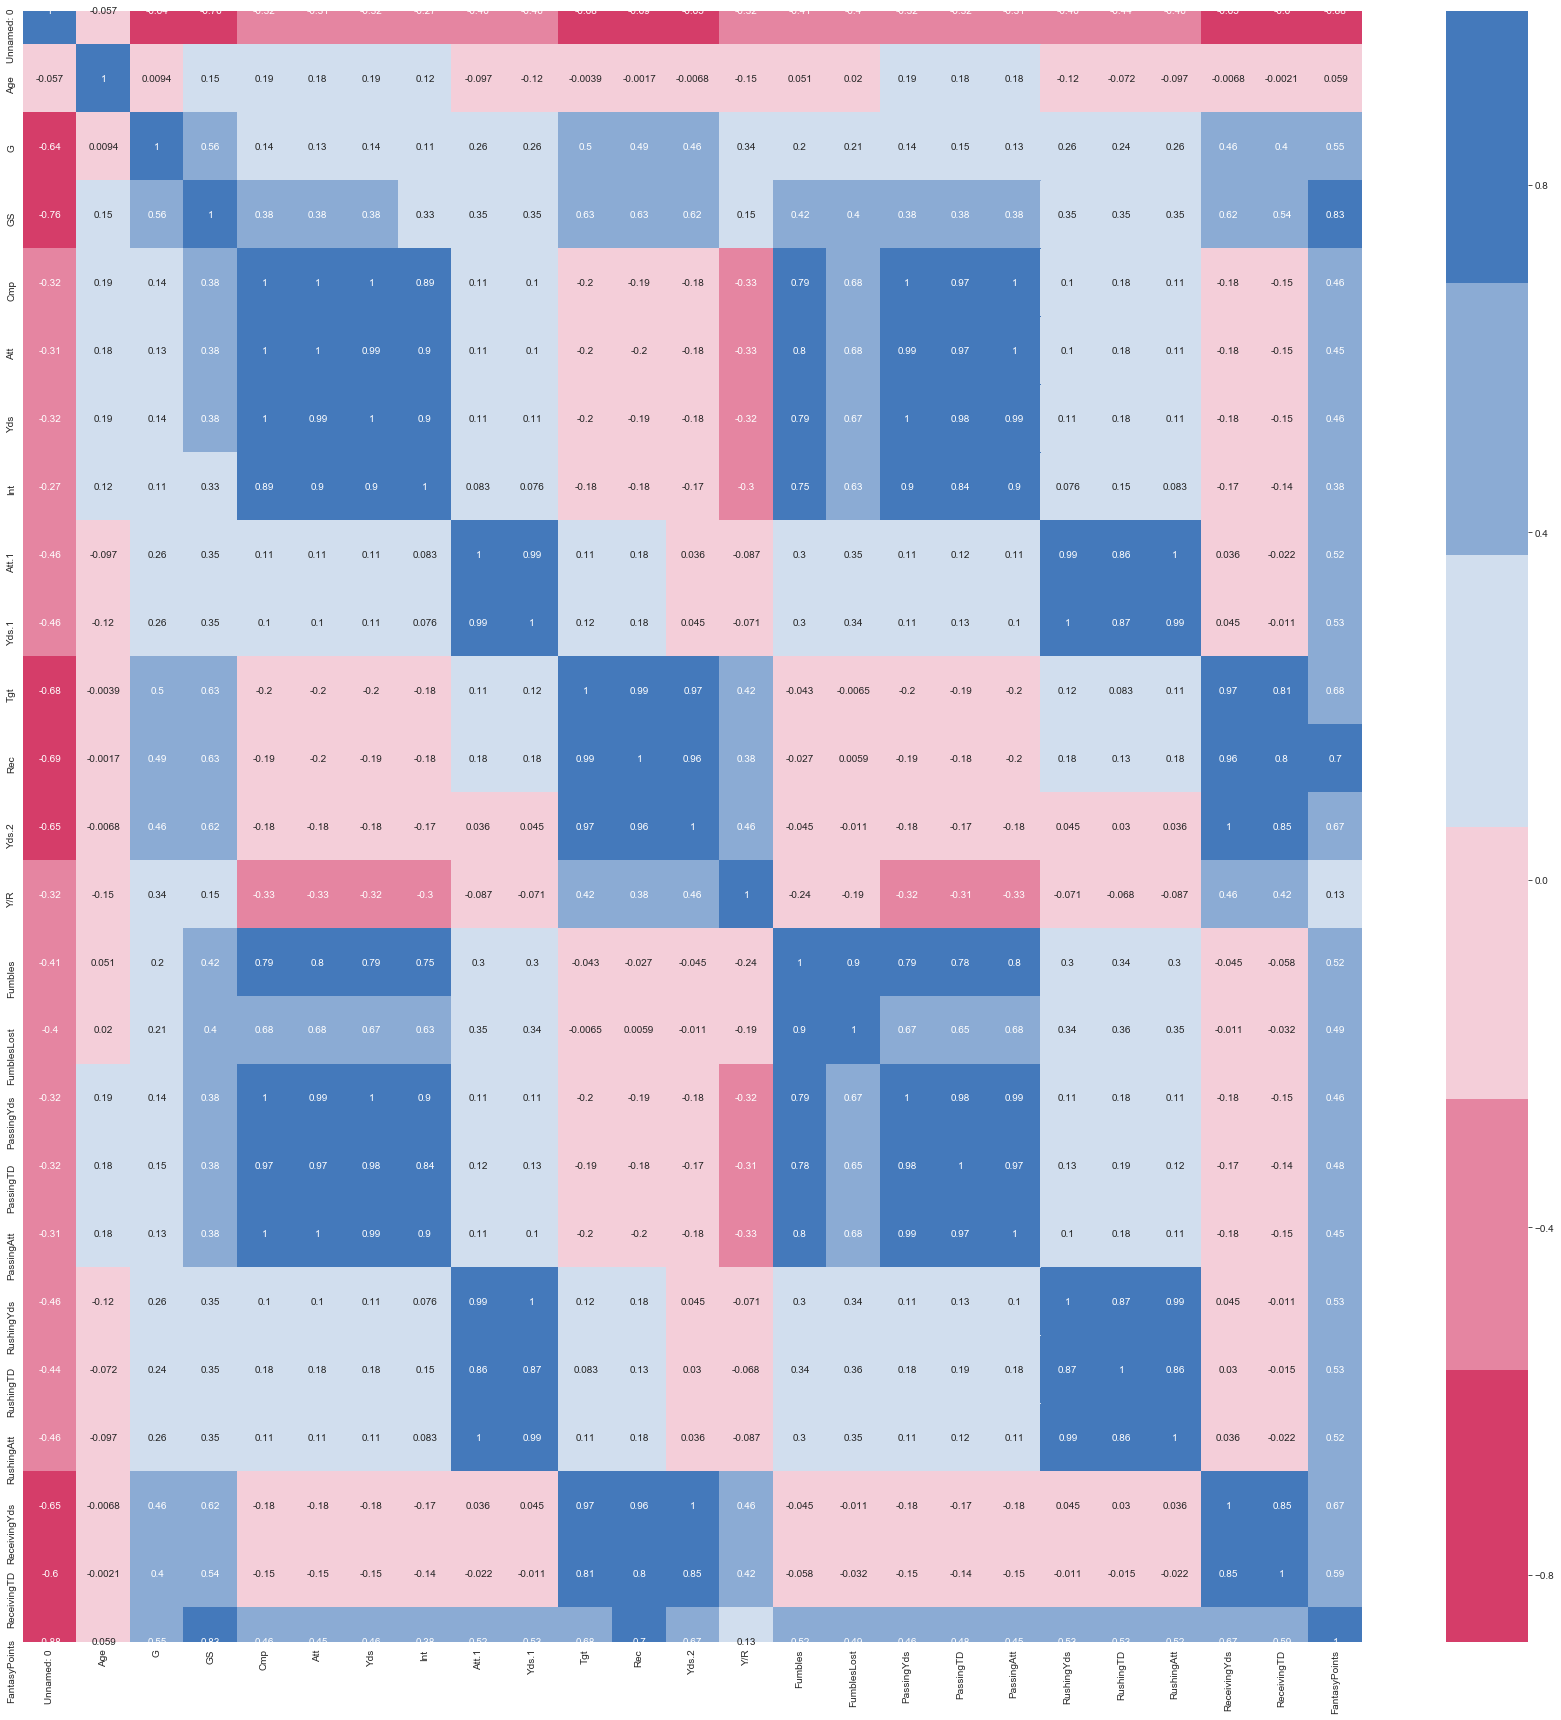

In [27]:
print("Step 6: Check correlations among features.\n")

sns.set_style('whitegrid');
plt.figure(figsize=(30, 30))
sns.heatmap(data_2019.corr(), annot=True, cmap=sns.diverging_palette(0, 250));

### Part 2
#### Step-by-step Instructions for Dimensionality and Feature Reduction:
##### FantasyPoints/GM is the "target"

* Step 8:  Feature Selection by removing positions that are not equal to Quarterback, wide-receiver, tight end, and running back.
* Step 9:  Feature Extraction by creating Fantasy Points per Game, Usage per Game, and efficiency (TD/usage) features.
* Step 7 (part 1):  Check visualizations for insights with updated features.

In [32]:
# Part 2 : the Dimensionality and Feature Reduction 
# FantasyPoints/GM is the "target"
# only keeping positions for Quarterback, wide-receiver, tight end, and running back

print("Step 8:  Feature Selection by removing positions that are not equal to Quarterback, wide-receiver, tight end, and running back.\n")
skill_positions = ['QB', 'WR', 'TE', 'RB']
data_2019 = data_2019.loc[data_2019['Pos'].isin(skill_positions)]

print("The updated dimension of the table is: ", data_2019.shape)

Step 8:  Feature Selection by removing positions that are not equal to Quarterback, wide-receiver, tight end, and running back.

The updated dimension of the table is:  (557, 28)


In [41]:
# Part 2 : the Dimensionality and Feature Reduction 
# FantasyPoints/GM is the "target"

print("Step 8:  Feature Extraction by creating Fantasy Points per Game, Usage per Game, and efficiency (TD/usage) features. \n")

#creating new columns

# Create new column for Fantasy points per game.
data_2019['FantasyPoints/GM'] = data_2019['FantasyPoints']/data_2019['G']
#round each row value to two decimal places
data_2019['FantasyPoints/GM'] = data_2019['FantasyPoints/GM'].apply(lambda x: round(x, 2))

# Create new column for usage per game. Usage is defined as # of targets + carries
data_2019['Usage/GM'] = (data_2019['PassingAtt'] + data_2019['RushingAtt'] + data_2019['Tgt'])/data_2019['G']

#round each row value to two decimal places
data_2019['Usage/GM'] = data_2019['Usage/GM'].apply(lambda x: round(x, 2))

# define efficiency as TD’s per usage.
data_2019['TD/Usage'] = (data_2019['PassingTD'] + data_2019['RushingTD']+ data_2019['ReceivingTD'])/(data_2019['PassingAtt'] + data_2019['RushingAtt'] + data_2019['Tgt'])

# Display the dimensions of the file 
print("The updated dimension of the table is: ", data_2019.shape)

print("All features: \n")
data_2019.info(verbose=True)

Step 8:  Feature Extraction by creating Fantasy Points per Game, Usage per Game, and efficiency (TD/usage) features. 

The updated dimension of the table is:  (557, 31)
All features: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 618
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        557 non-null    int64  
 1   Player            557 non-null    object 
 2   Tm                557 non-null    object 
 3   Pos               557 non-null    object 
 4   Age               557 non-null    float64
 5   G                 557 non-null    float64
 6   GS                557 non-null    float64
 7   Cmp               557 non-null    float64
 8   Att               557 non-null    float64
 9   Yds               557 non-null    float64
 10  Int               557 non-null    float64
 11  Att.1             557 non-null    float64
 12  Yds.1             557 non-null    float64
 13  

Step 7 (part 1): Check visualizations for insights with updated features. 

Pairwise correlations for final features 



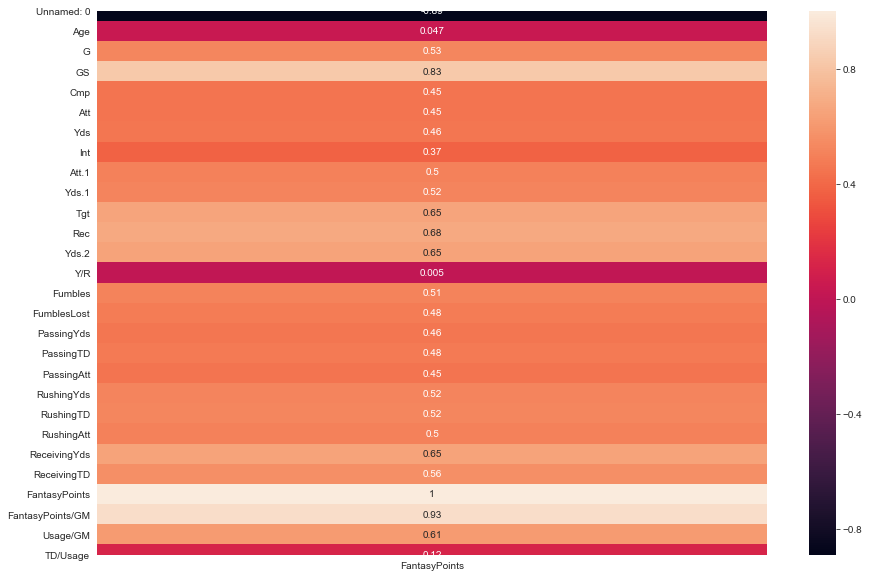

In [43]:
print("Step 7 (part 1): Check visualizations for insights with updated features. \n")

print("Pairwise correlations for final features \n")
# calculate pairwise correlations for final features
plt.figure(figsize=(15, 10))
sns.heatmap(data_2019.corr()[['FantasyPoints']], annot=True)

Step 7 (part 1): Check visualizations for insights with updated features. 

Pairwise plots for remaining features 



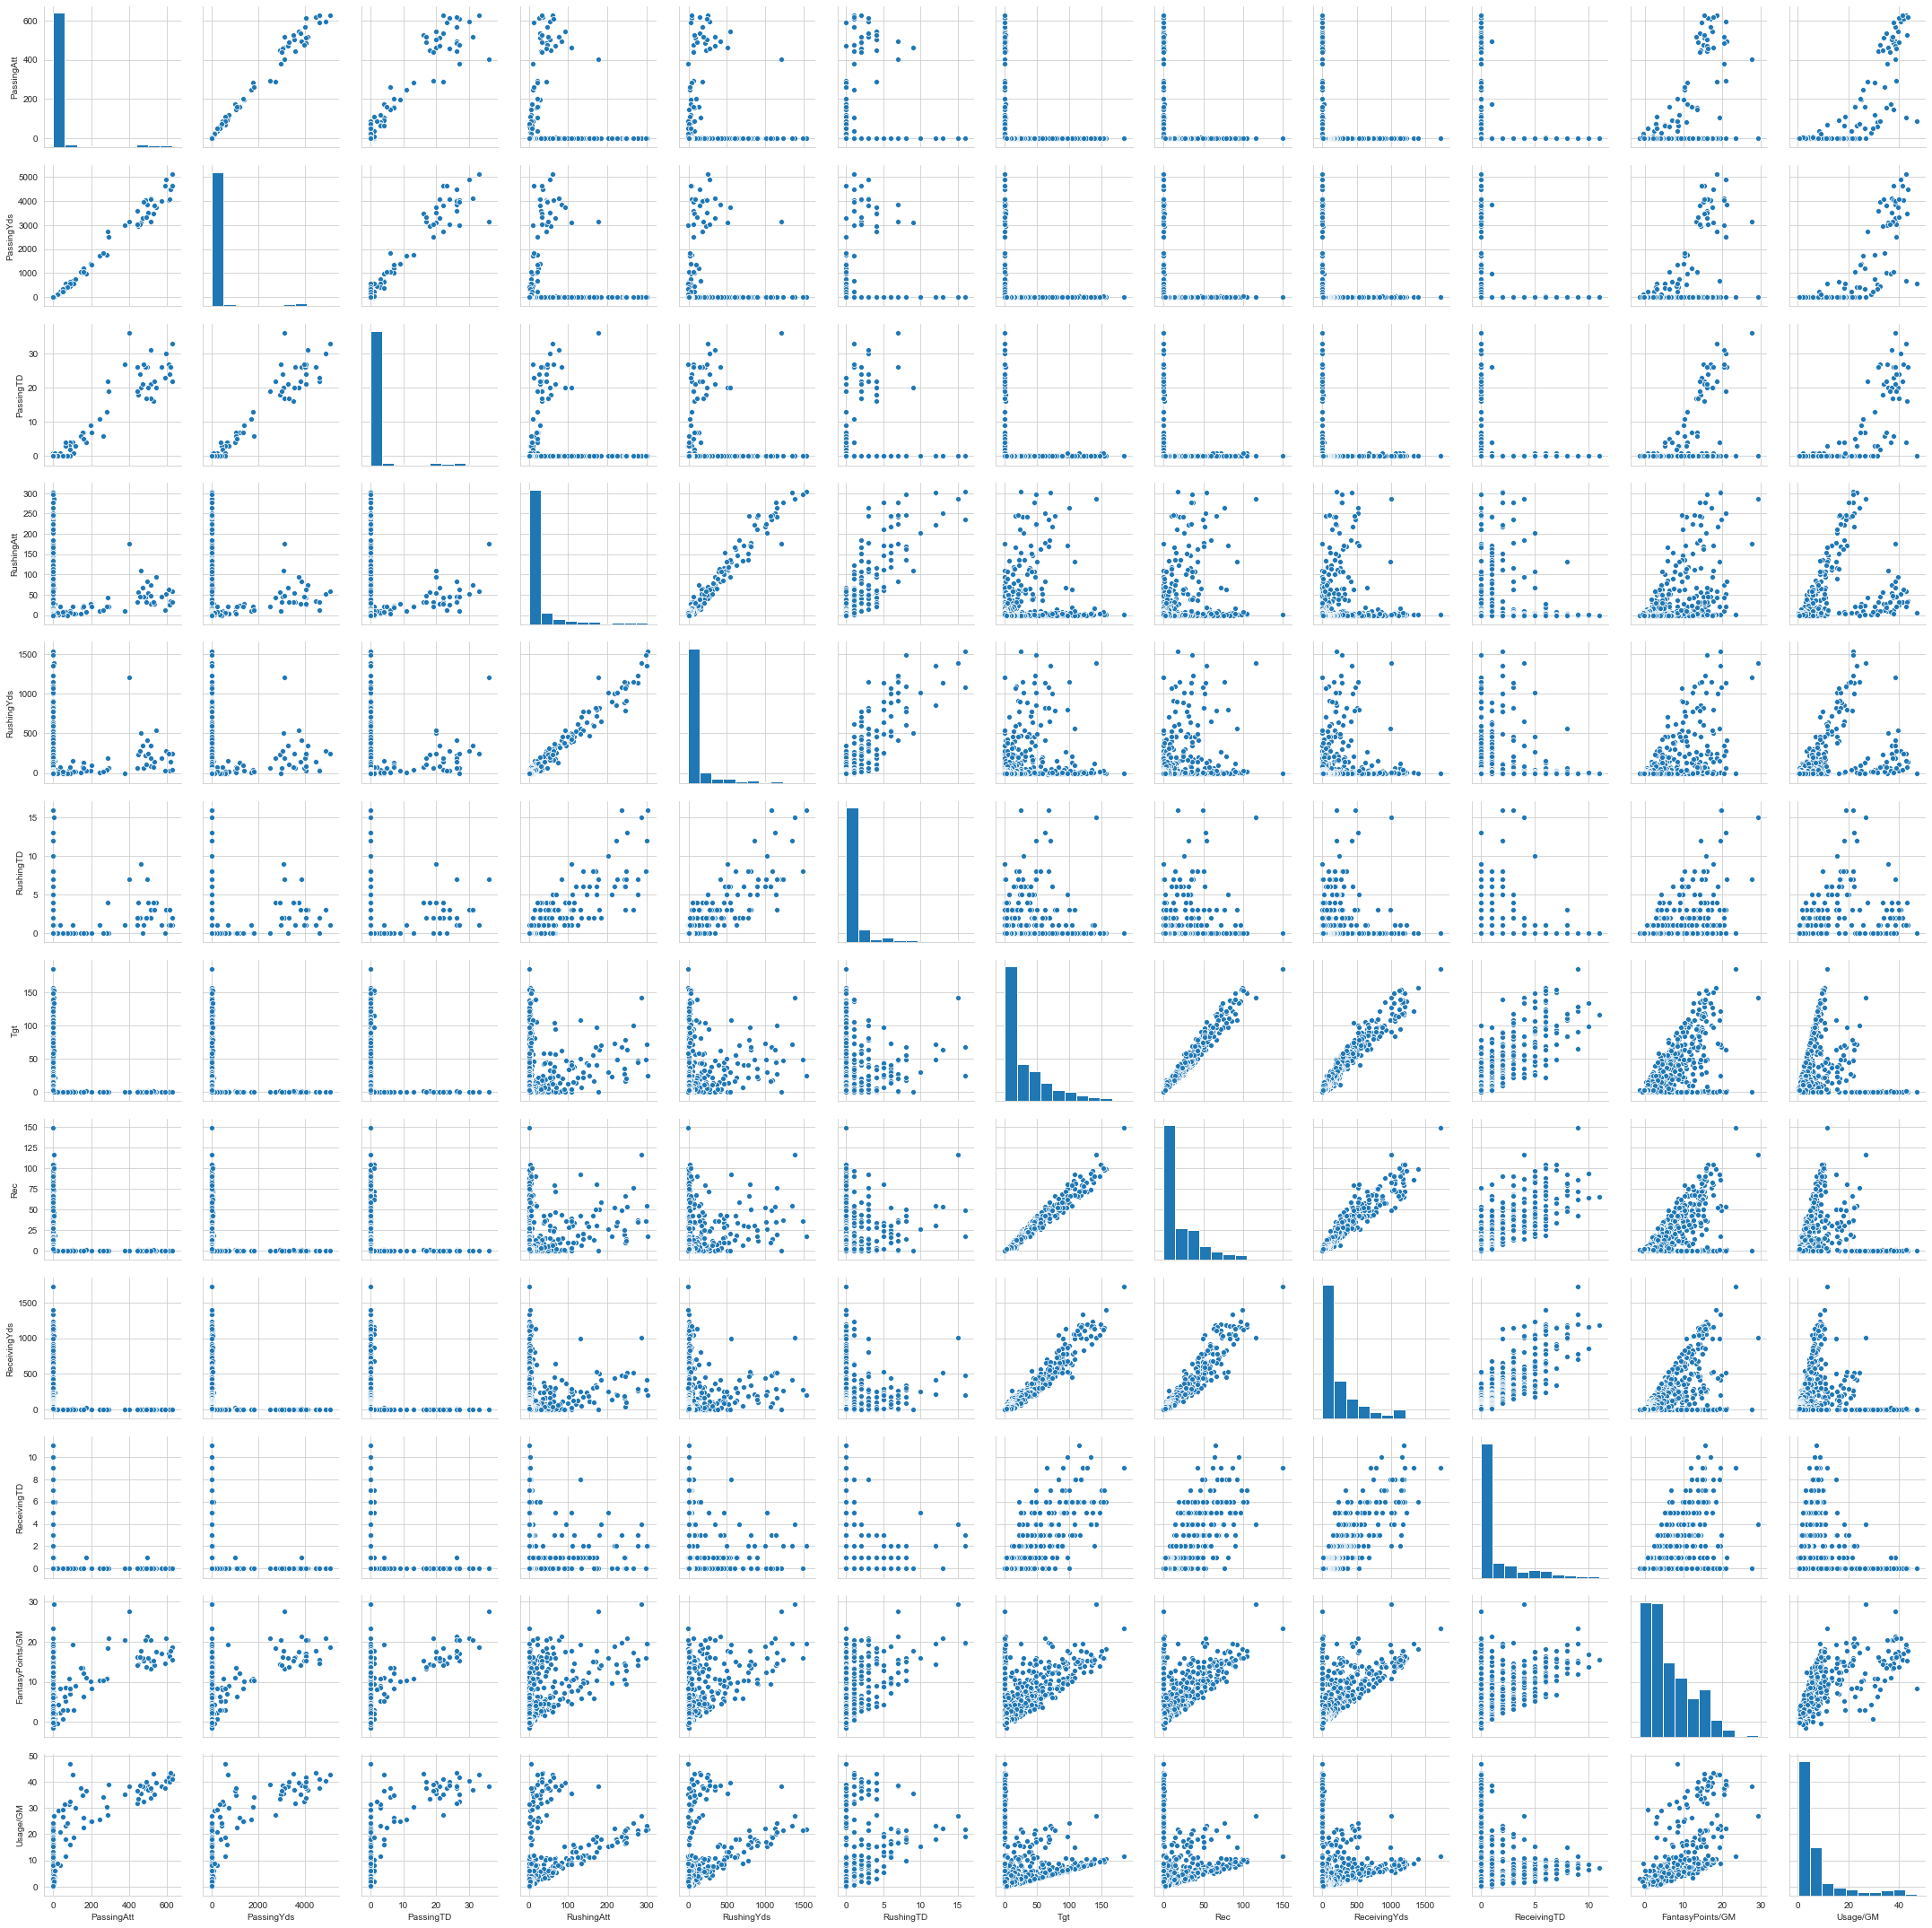

In [44]:
print("Step 7 (part 1): Check visualizations for insights with updated features. \n")

print("Pairwise plots for remaining features \n")
# Part 1 pairwise plots for remaining features
data_copy = data_2019[['PassingAtt','PassingYds','PassingTD','RushingAtt','RushingYds','RushingTD',
                  'Tgt','Rec','ReceivingYds','ReceivingTD','FantasyPoints/GM','Usage/GM']]
sns.pairplot(data_copy)

Step 7 (part 1): Check visualizations for insights with updated features. 

Usage correlated to fantasy points: 



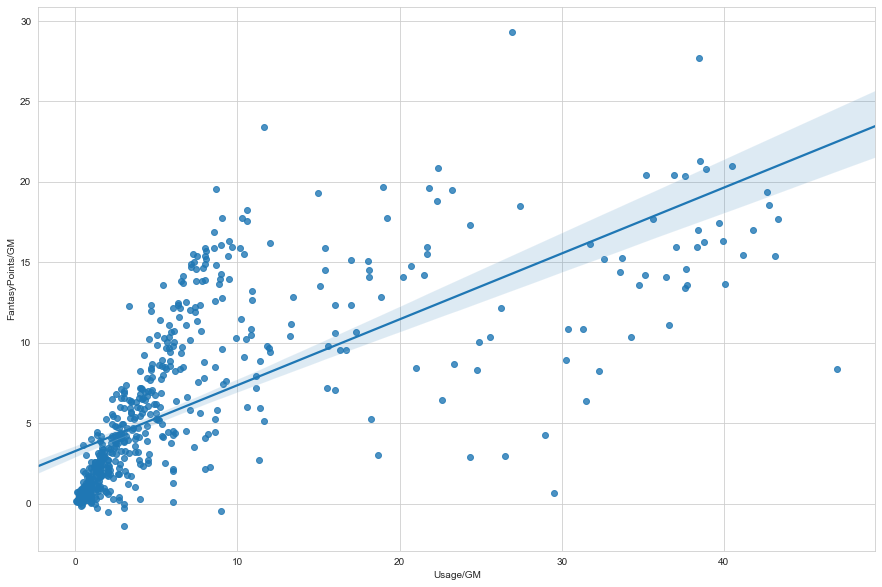

In [45]:
print("Step 7 (part 1): Check visualizations for insights with updated features. \n")

print("Usage correlated to fantasy points: \n")

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=data_2019['Usage/GM'],
y=data_2019['FantasyPoints/GM'],
scatter=True,)

Step 7 (part 1): Check visualizations for insights with updated features. 

Efficiency correlated to fantasy points: 



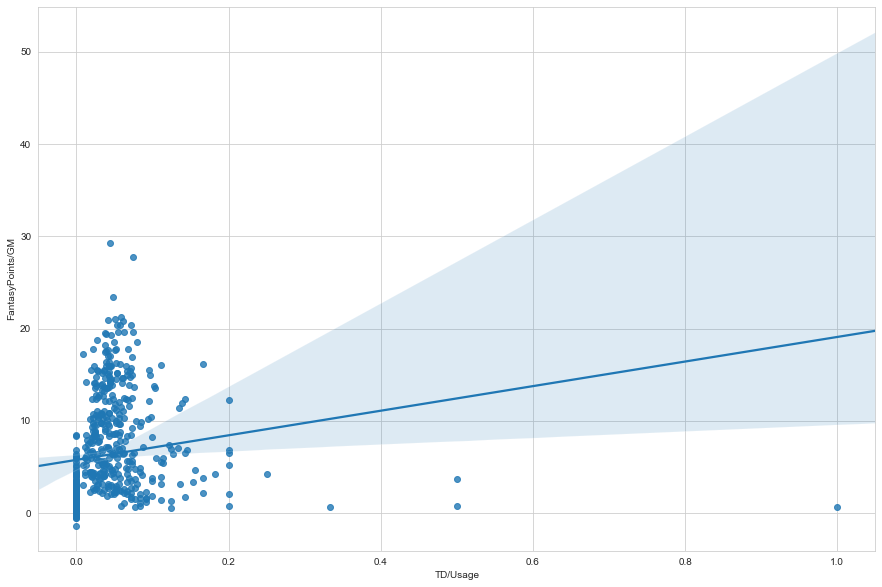

In [46]:
print("Step 7 (part 1): Check visualizations for insights with updated features. \n")

print("Efficiency correlated to fantasy points: \n")

# efficiency correlate to fantasy
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plot = sns.regplot(
x=data_2019['TD/Usage'],
y=data_2019['FantasyPoints/GM'],
scatter=True)

### Part 3
#### Step-by-step Instructions for Model Evaluation and Selection:
##### FantasyPoints/GM is the "target"

    For part three I used the LinearRegression model from sklearn.linear_model. My feature matrix consists of Usage/GM and Efficiency (TD/Usage). My target was Fantasy Points (FantasyPoints/GM). I used the train_test_split function to split the data. I set it to train 80% of the data and test it with the remaining 20%. The mean absolute error was 2.73 which means that on average the model was off by roughly 3 fantasy points per game. I would like to try a couple more models over the next two weeks and try to add in averages. I would also like to add in 2018 data.
    
Step-by-step instructions for Model Evaluation and Selection
   * Step 10. Set X equal to the feature columns - Usage/GM and Efficiency (TD/Usage)
   * Step 11. Set Y equal to the target variable - FantasyPoints/GM
   * Step 12. Using the train_test_split() function, split the data into test and train
   * Step 13. Instantiate the LinearRegression model using default parameters
   * Step 14. Fit the model with data
   * Step 15. Evaluate the model using mean absolute error

In [59]:
print("Step 10. Set X equal to the feature columns - Usage/GM and Efficiency (TD/Usage) \n")
# feature matrix
X = data_2019[[
    'Usage/GM','TD/Usage'
]].values

print("Feature Matrix: ", X.shape)

Step 10. Set X equal to the feature columns - Usage/GM and Efficiency (TD/Usage) 

Feature Matrix:  (557, 2)


In [60]:
print("Step 11. Set Y equal to the target variable - FantasyPoints/GM \n")

# target array
y = data_2019['FantasyPoints/GM'].values

print("Target Array: ", y.shape)

Step 11. Set Y equal to the target variable - FantasyPoints/GM 

Target Array:  (557,)


In [61]:
# Part Three

print("Step 12. Using the train_test_split() function, split the data into test and train \n")

# split up our data in to 20% testing, 80% training
# train_test_split documentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("Split Shapes:")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Step 12. Using the train_test_split() function, split the data into test and train 

Split Shapes:


((445, 2), (112, 2), (445,), (112,))

In [62]:
print("Step 13. Instantiate the LinearRegression model using default parameters. \n")

# sklearn.linear_model.LinearRegression
lr = LinearRegression()

lr

Step 13. Instantiate the LinearRegression model using default parameters. 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print("Step 14. Fit the model with data. & \n  Step 15. Evaluate the model using mean absolute error\n")

# train the algorithm
lr.fit(X_train, y_train)

"""
Predicted values using testing data. Compare the predicted values to 
real world values and try to quantify the difference between our model and reality
"""
y_pred = lr.predict(X_test)

"""
A mean absolute error of 2.73 means the model was on average off by 3 fantasy points per game.
"""

print("Linear Regression Mean Absolute Error: ")
# mean_absolute_error
mean_absolute_error(y_pred, y_test)

Step 14. Fit the model with data. & 
  Step 15. Evaluate the model using mean absolute error

Linear Regression Mean Absolute Error: 


2.727607987884648

### Week 9/10 updates
#### Trying additional Models
##### FantasyPoints/GM is the "target"
    
Step-by-step instructions for Model Evaluation and Selection
   * Step 16. Instantiate the BayesianRidge model
   * Step 17. Instantiate the SVM model
   * Step 18. Evaluate the model using mean absolute error

In [74]:
print("Step 16. Instantiate the BayesianRidge model\n")

from sklearn import linear_model
brl = linear_model.BayesianRidge()

# train the algorithm
brl.fit(X_train, y_train)

brl_y_pred = brl.predict(X_test)

print("BayesianRidge Error: ")
# mean_absolute_error
mean_absolute_error(brl_y_pred, y_test)

Step 16. Instantiate the BayesianRidge model

BayesianRidge Error: 


2.728457911488399

In [75]:
from sklearn import svm

print("Step 17. Instantiate the Support vector machine \n")
# model
regr = svm.SVR()
regr.fit(X_train, y_train)

regr_y_pred = regr.predict(X_test)

# Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
print("SVM Error: ")
# mean_absolute_error
mean_absolute_error(regr_y_pred, y_test)

Step 16. Instantiate the Support vector machine 

SVM Error: 


C:\Users\swim_\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2.3618195439995646

In [80]:
from sklearn import linear_model

print("Step 17. Instantiate the Lasso \n")

lalf = linear_model.Lasso(alpha=0.1)
lalf.fit([[0, 0], [1, 1]], [0, 1])

lalf_y_pred = lalf.predict(X_test)

print("Lasso Mean Absolute Error: ")
# mean_absolute_error
mean_absolute_error(lalf_y_pred, y_test)

Lasso Mean Absolute Error: 


2.9747321428571425

##### Conclusion
   For my case study I chose Fantasy Football Analysis. I selected this topic because this is my first time participating in a fantasy football league, so I thought it would be helpful to understand all the different analysis in my ESPN fantasy app. Specifically, I would like to understand how the players’ projections are created.  
    I have learned a lot through out this whole project. Seeing all the steps put together helped me understand the complete process of using models and there are many steps.  
    For part one I reviewed my data through for Graph Analysis. Some key steps for this was checking dimensions, variables types, summary statistics, and correlations. After understanding the variable better feature selection and extraction was next. This included selection by removing positions that are not equal to Quarterback, wide-receiver, tight end, and running back. Feature Extraction by creating Fantasy Points per Game, Usage per Game, and efficiency (TD/usage) features.  
    For part three I used the LinearRegression model from sklearn.linear_model. My feature matrix consists of Usage/GM and Efficiency (TD/Usage). My target was Fantasy Points (FantasyPoints/GM). I used the train_test_split function to split the data. I set it to train 80% of the data and test it with the remaining 20%. The mean absolute error was 2.73 which means that on average the model was off by roughly 3 fantasy points per game. The model with the lowest absolute error was SVM of 2.36.  
